'ldh', 'creatinine', 'ck_mb', 'diabetes', 'age', 'ischemia_modification_albumin', 'plt', 'hbdh', 'crp', 'bilirubin', 'tco2', 'alt', 'ldl', 'hba1c', 'ast', 'aptt', 'nihss', 'd_dimer', 'hypertension', 'wbc'
AUC: 0.9853744939271255
Accuracy: 0.9626865671641791
Sensitivity/Recall: 0.9102564102564102
Specificity: 0.9842105263157894
F1-score: 0.9342105263157894
PPV/precision: 0.9594594594594594
NPV: 0.9842105263157894
Cutoff: 0.6


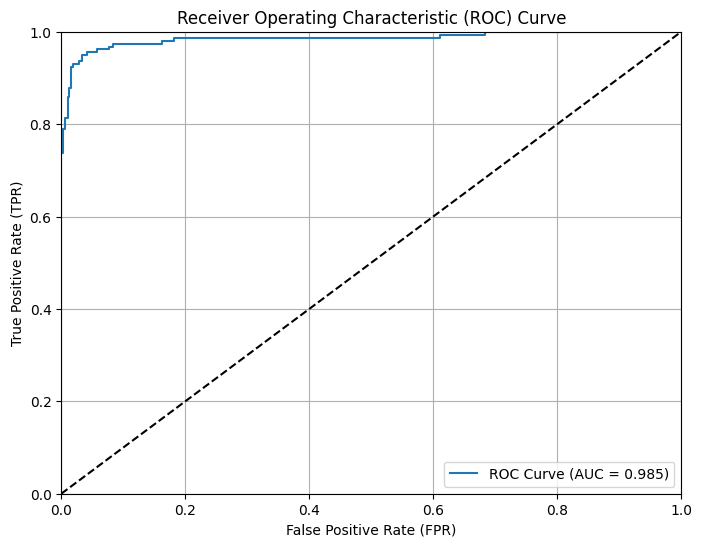

In [35]:
import pickle
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import joblib

# 读取保存的模型文件
model = joblib.load(r'H:\model\second_epilepsy\RF_model.pkl')

# 读取测试数据集
data = pd.read_csv(r'H:\data\external_sample.csv')
var = 'second_epilepsy'
y_test = data[var]
feature_names = ['ldh', 'creatinine', 'ck_mb', 'diabetes', 'age',
                 'ischemia_modification_albumin', 'plt', 'hbdh', 'crp', 'bilirubin',
                 'tco2', 'alt', 'ldl', 'hba1c', 'ast', 'aptt', 'nihss', 'd_dimer',
                 'hypertension', 'wbc']
X_test = data[feature_names]

formatted_names = ', '.join([f"'{name}'" for name in feature_names])

print(formatted_names)

# 使用模型对测试数据进行预测
y_scores = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# 计算真正率和假正率
fpr, tpr, _ = roc_curve(y_test, y_scores)

# 计算 AUC 值
auc = roc_auc_score(y_test, y_scores)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

# 计算灵敏度/召回率
sensitivity = recall_score(y_test, y_pred)

# 计算特异度
specificity = recall_score(y_test, y_pred, pos_label=0)

# 计算F1分数
f1 = f1_score(y_test, y_pred)

# 计算阳性预测值/精确度
precision = precision_score(y_test, y_pred)

# 计算阴性预测值
negative_predictive_value = recall_score(y_test, y_pred, pos_label=0)

# 打印AUC、准确率、灵敏度/召回率、特异度、F1分数、阳性预测值/精确度、阴性预测值和截断点
print('AUC:', auc)
print('Accuracy:', accuracy)
print('Sensitivity/Recall:', sensitivity)
print('Specificity:', specificity)
print('F1-score:', f1)
print('PPV/precision:', precision)
print('NPV:', negative_predictive_value)
print('Cutoff:', 0.6)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.3f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()